Bond data for Australia


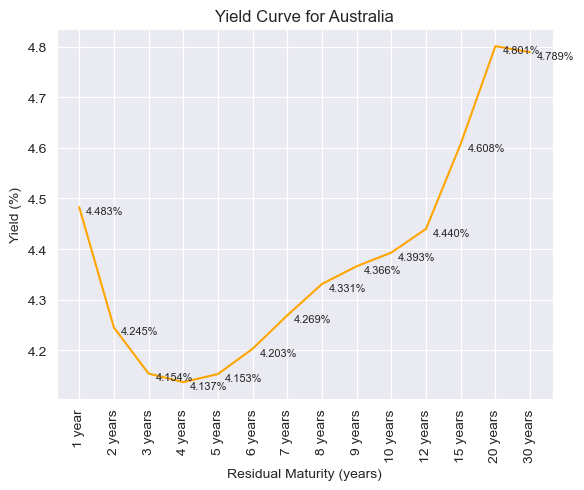

Bond data for Austria


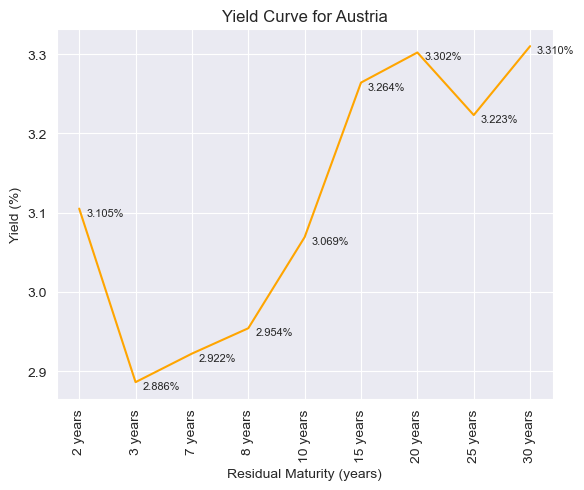

Bond data for Bangladesh


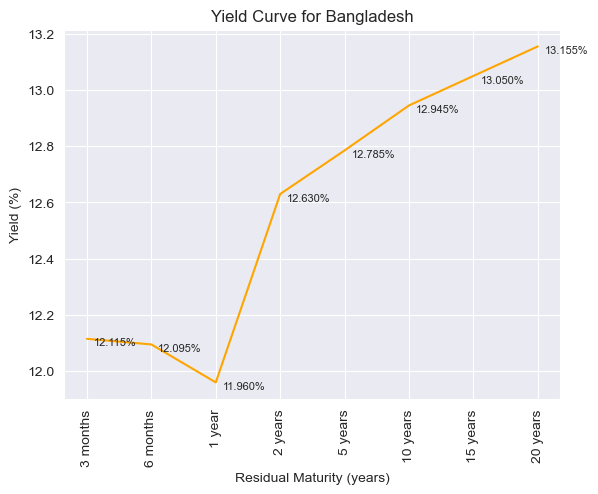

Bond data for Belgium


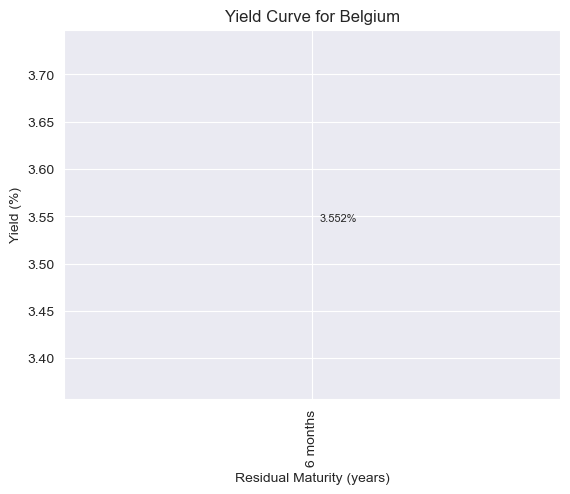

Bond data for Botswana


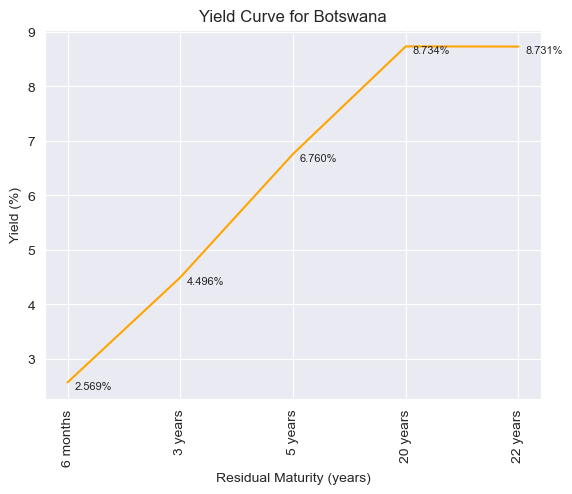

Bond data for Brazil


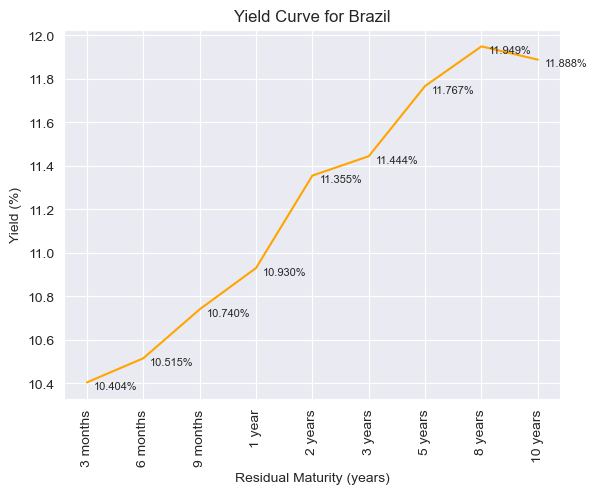

Bond data for Bulgaria


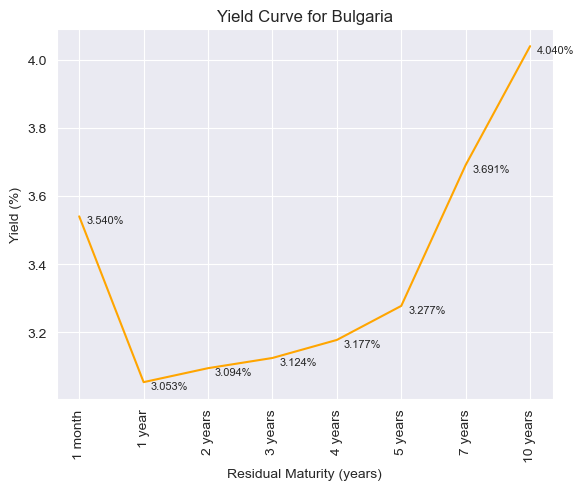

Bond data for Canada


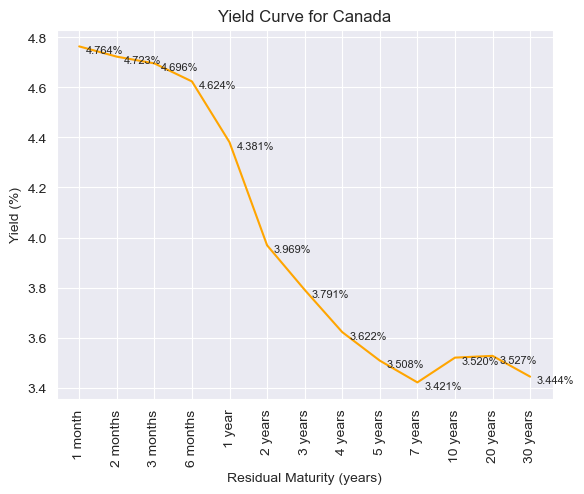

Bond data for Chile


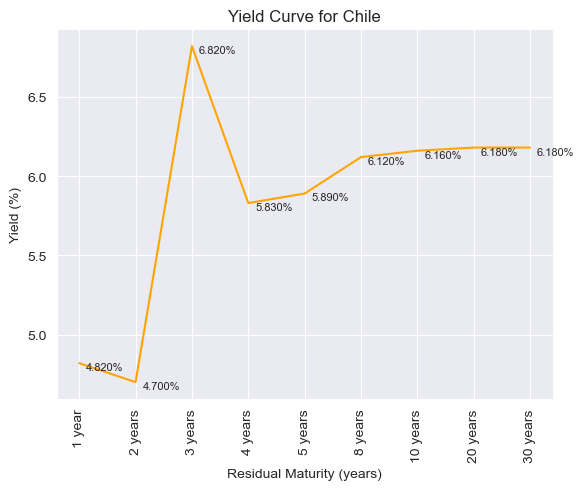

Bond data for China


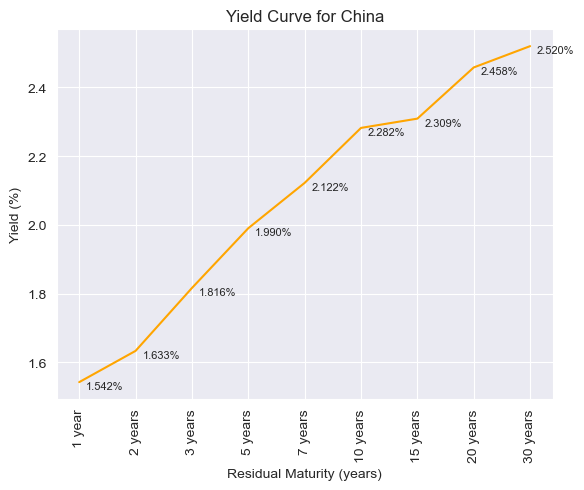

Bond data for Colombia


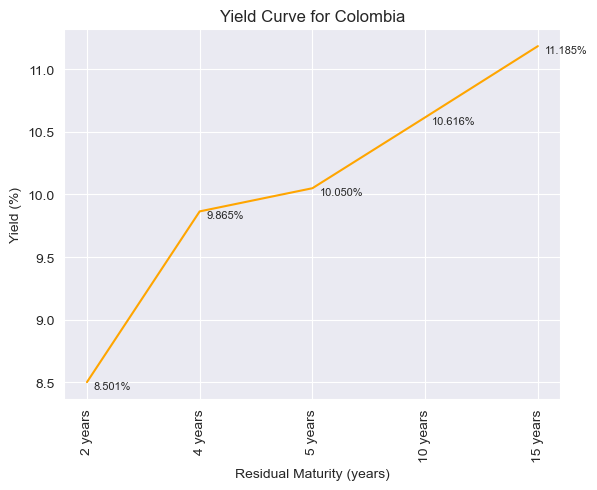

Bond data for Croatia


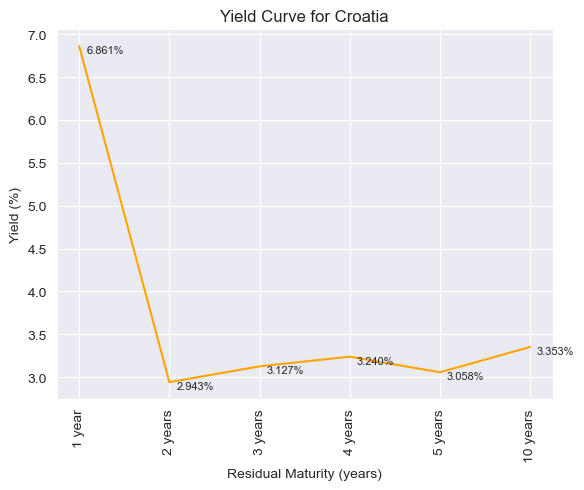

Bond data for Cyprus


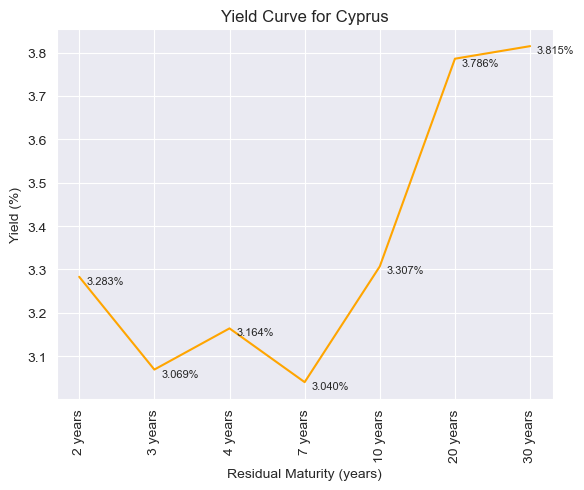

Bond data for Czech-republic


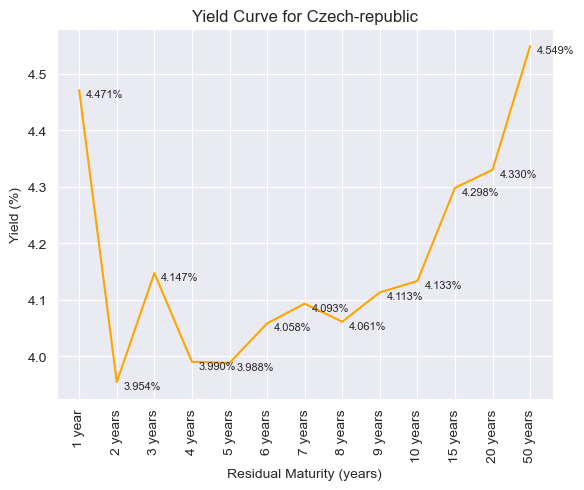

Bond data for Denmark


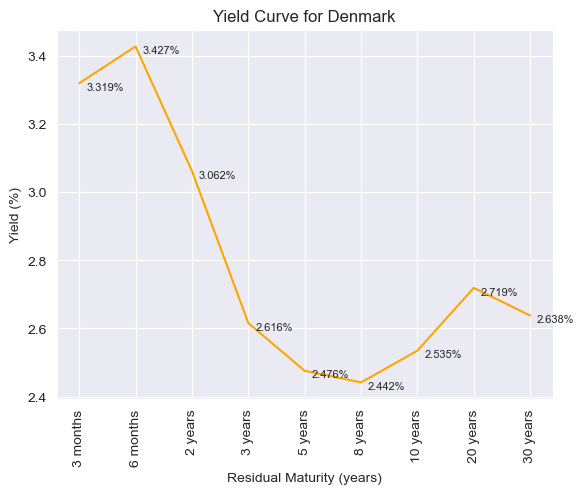

Bond data for Egypt


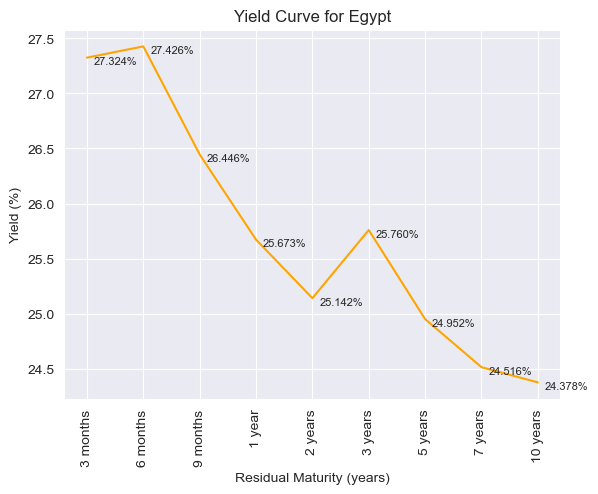

Bond data for Finland


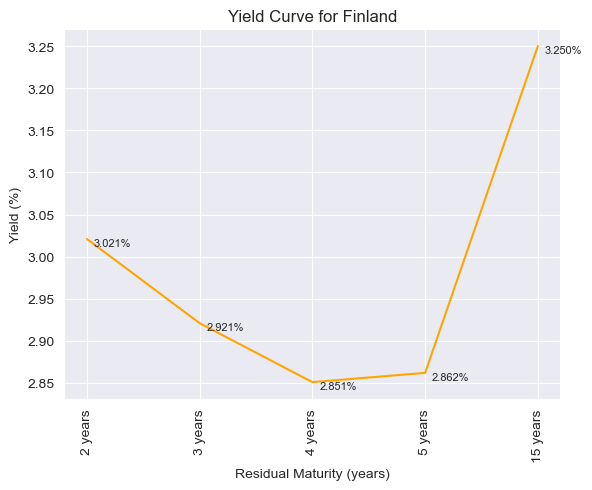

Bond data for France


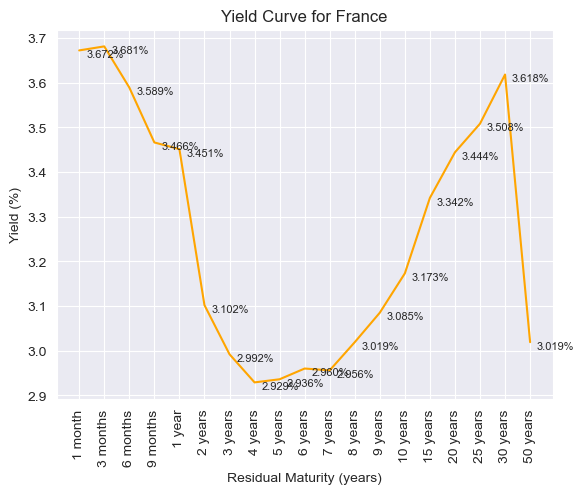

Bond data for Germany


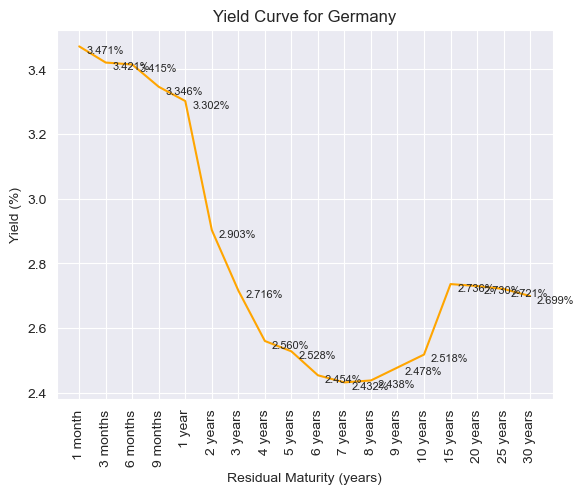

Bond data for Greece


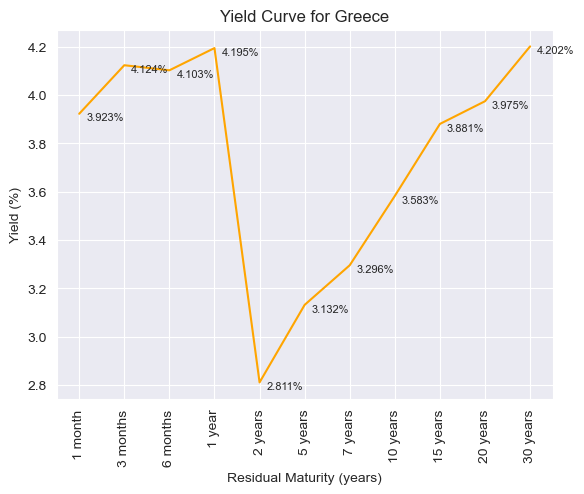

Bond data for Hong-kong


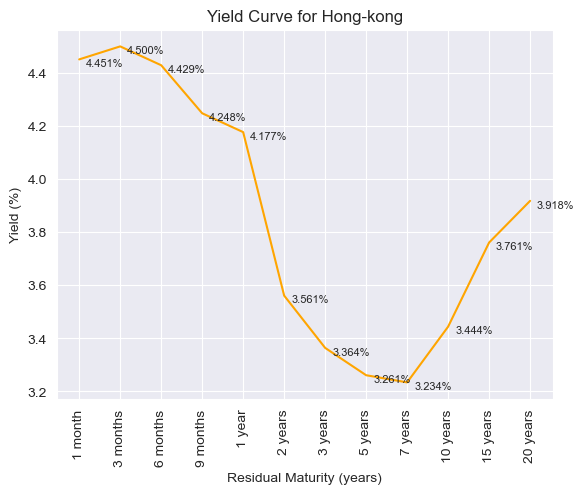

Bond data for Hungary


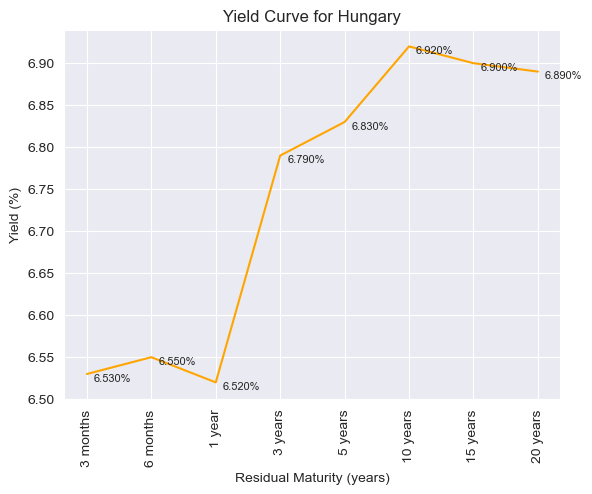

Bond data for Iceland


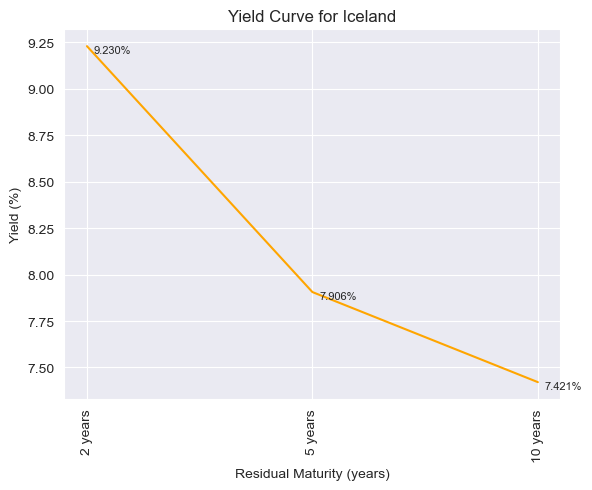

Bond data for India


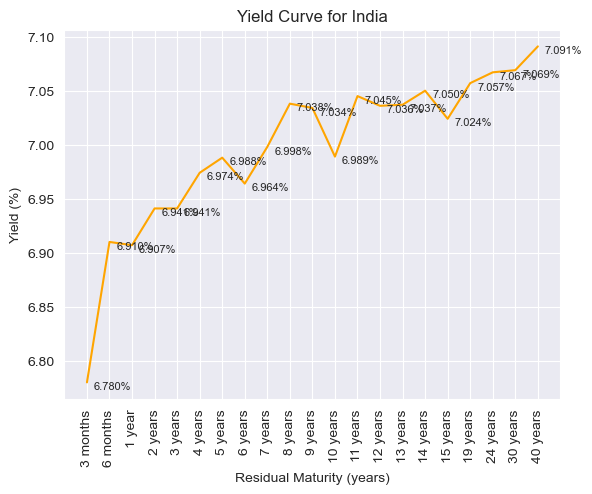

Bond data for Indonesia


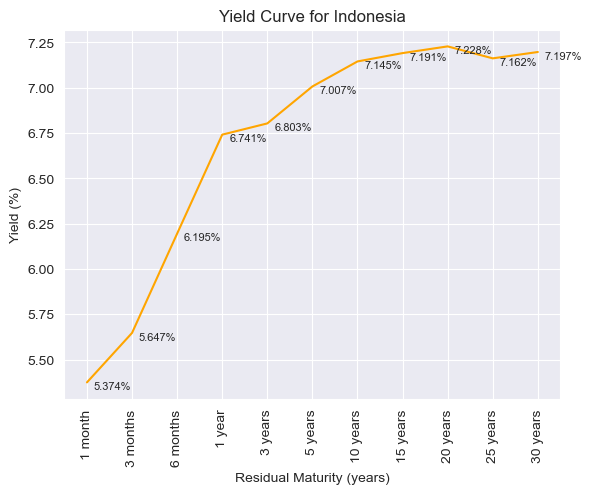

Bond data for Ireland


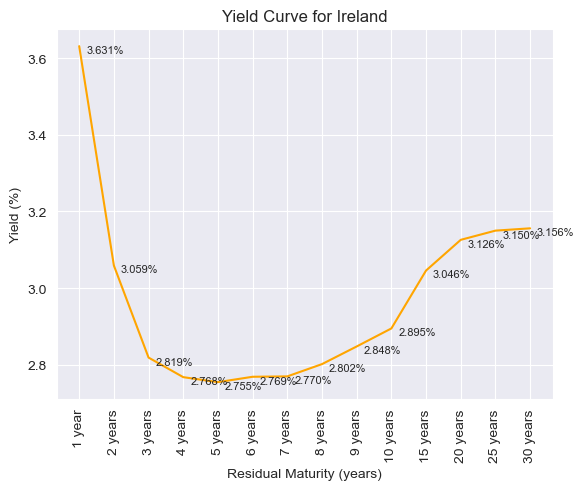

Bond data for Israel


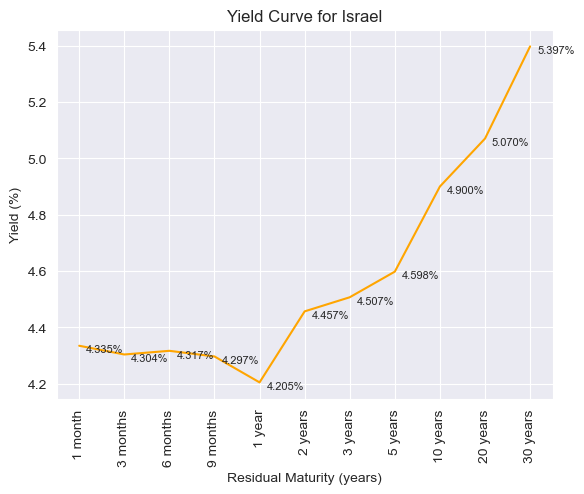

Bond data for Italy


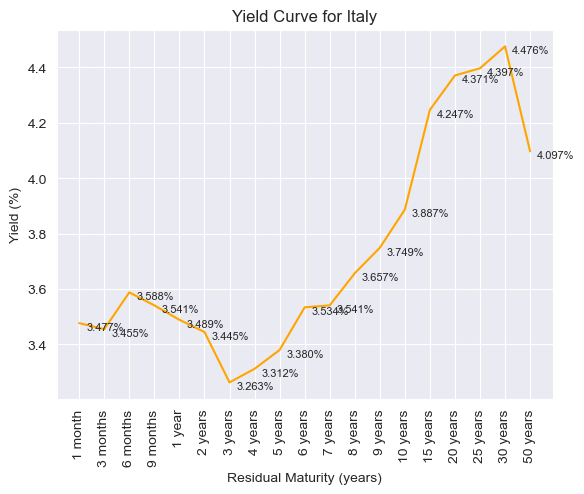

Bond data for Japan


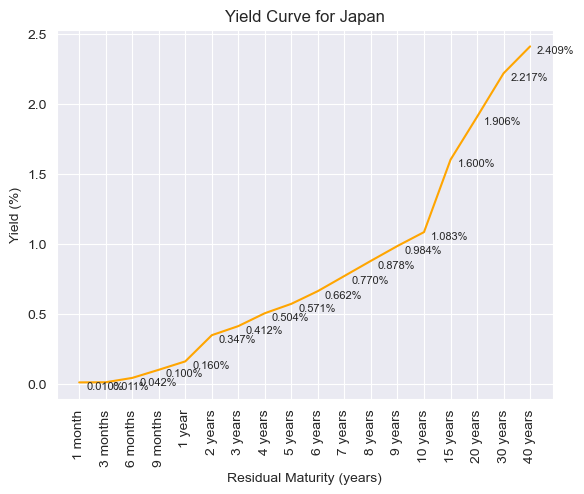

Bond data for Jordan


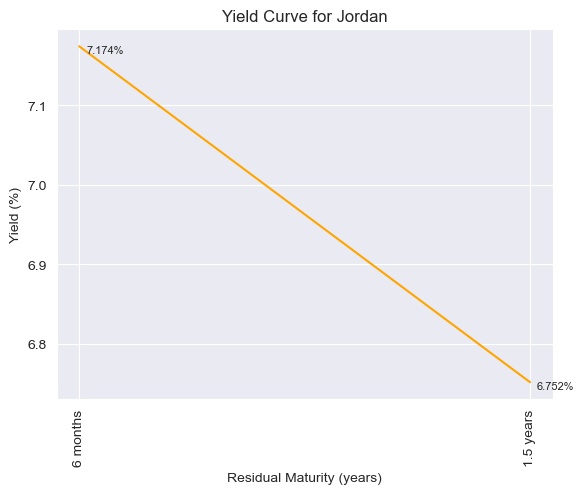

Bond data for Kenya


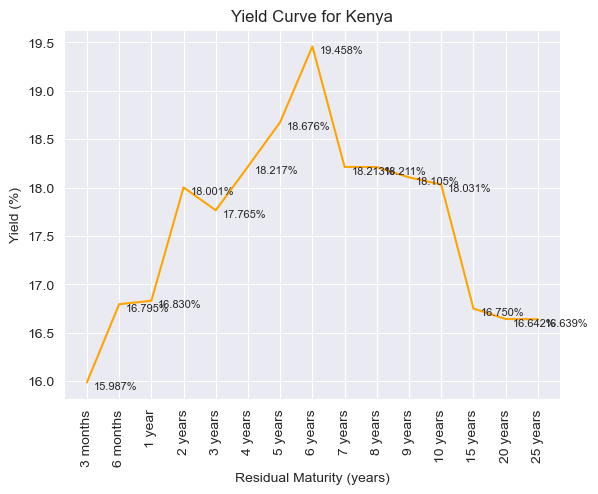

Bond data for Kazakhstan


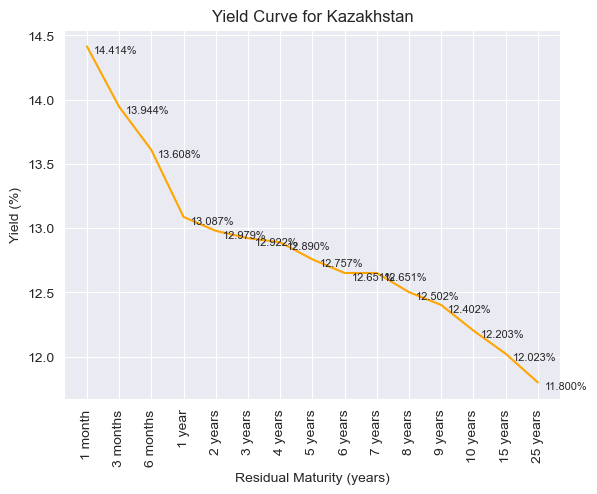

Bond data for Latvia


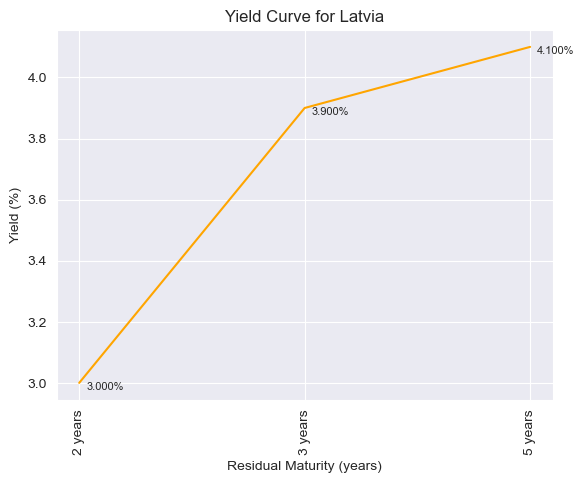

Bond data for Lithuania


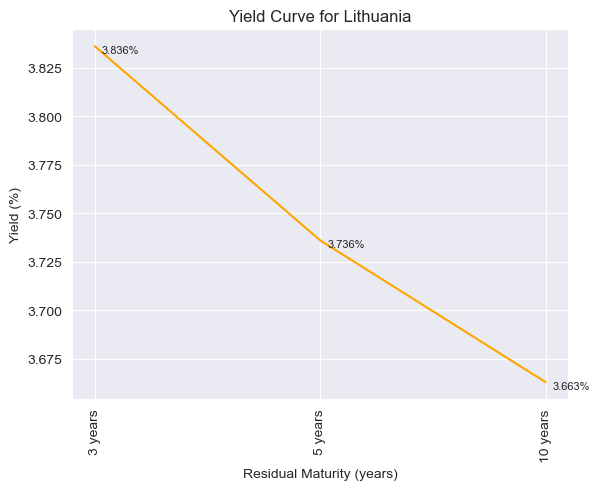

Bond data for Malaysia


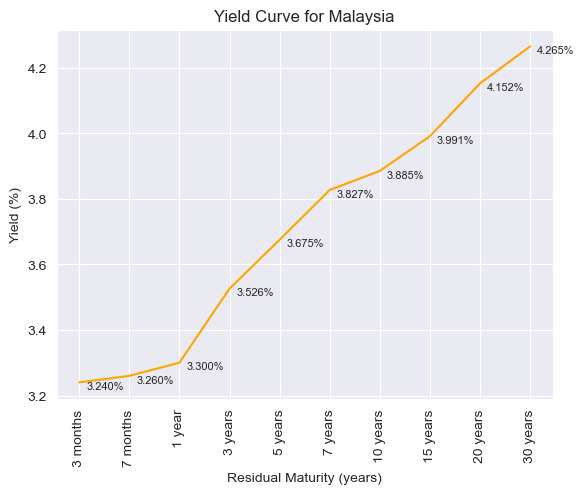

Bond data for Malta


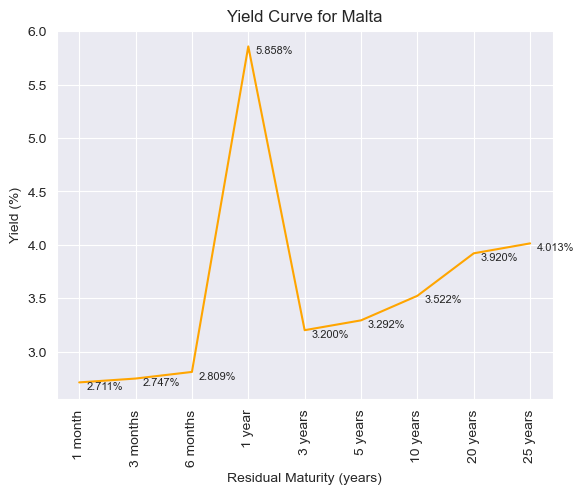

Bond data for Mexico


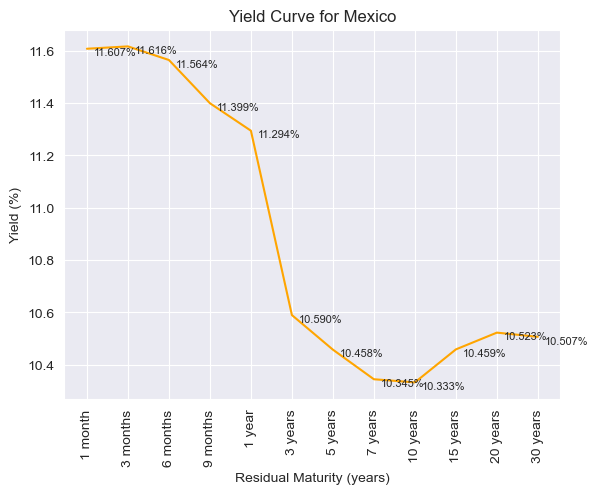

Bond data for Morocco


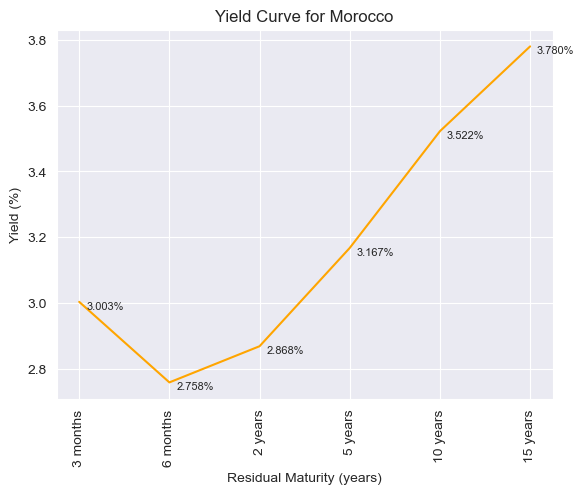

Bond data for Namibia


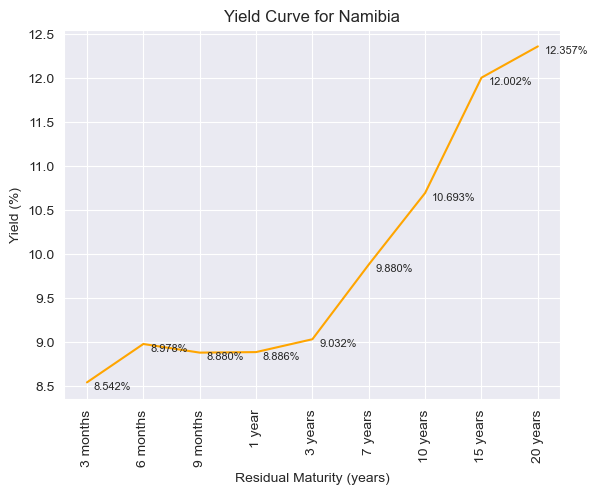

Bond data for Netherlands


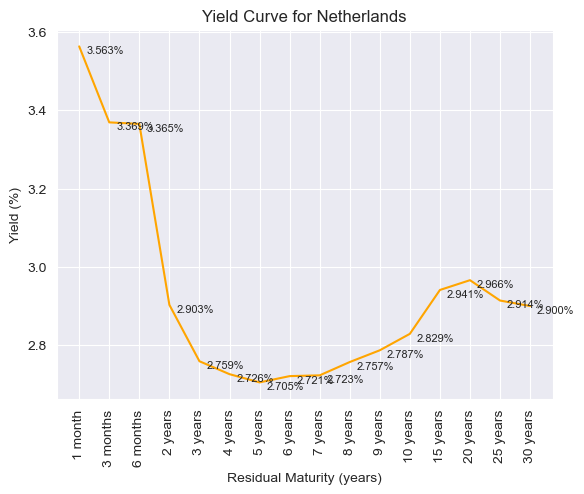

In [ ]:
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
# Specify the exact font name based on the font file
font_name = 'DejaVu Sans Mono'

# Set the default font for the entire script
plt.rcParams['font.family'] = font_name

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:90.0) Gecko/20100101 Firefox/90.0",
}

# Define a list of countries
countries = ['Australia', 'Austria', 'Bangladesh', 'Belgium', 'Botswana', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech-Republic', 'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Hong-Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya', 'Kazakhstan', 'Latvia', 'Lithuania', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Namibia', 'Netherlands', 'New-Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Perù', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovakia', 'Slovenia', 'South-Africa', 'South-Korea', 'Spain', 'Sri-Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Uganda', 'United-Kingdom', 'United-States', 'Ukraine', 'Vietnam', 'Zambia']

# Loop over the countries
for country in countries:
    url = f'http://www.worldgovernmentbonds.com/country/{country}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the div with class "w3-responsive"
    div = soup.find('div', {'class': 'w3-responsive'})

    # Extract the table headers
    headers = [header.text for header in div.find_all('th')]

    # Extract the table rows
    rows = div.find_all('tr')

    # Extract the data from each row
    print(f"Bond data for {country.capitalize()}")
    yields = []
    maturities = []
    for row in rows:
        cols = row.find_all('td')
        data = [col.text.strip() for col in cols]
        if len(data) >= 3 and data[2].strip().endswith('%'):
            yield_value = float(data[2].replace('%',''))
            yields.append(yield_value)
            maturities.append(data[1])

    # Plot the yield curve
    sns.set_style("darkgrid")
    plt.plot(yields, color='orange')
    for i, yield_value in enumerate(yields):
        plt.annotate(f'{yield_value:.3f}%', xy=(i, yield_value), xytext=(5, -5), textcoords='offset points',fontsize=8)
    plt.xticks(range(len(maturities)), maturities, rotation=90)
    plt.xlabel('Residual Maturity (years)')
    plt.ylabel('Yield (%)')
    plt.title(f'Yield Curve for {country.capitalize()}')
    plt.show()
